In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from PIL import Image
import matplotlib.patches as patches

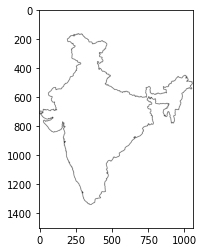

In [4]:
# img = mpimg.imread("norway-23574_1280.png")
image = Image.open("imgs/india-map.jpg").convert("L")
# image = Image.open("norway-23574_1280.png").convert("L")
image.save("gray_image.png")
img = mpimg.imread("gray_image.png")
plt.imshow(img, cmap='gray')

In [5]:
def findCentroidPoint(cords):
    x_points_count = 0
    y_points_count = 0
    x_points_sum = 0
    y_points_sum = 0
    # summation of x and y
    for points in cords:
        x_points_sum += points[0]
        y_points_sum += points[1]
        y_points_count += 1
        x_points_count += 1
    # centroid: summation divided by number of nodes      
    center = (x_points_sum/x_points_count, y_points_sum/y_points_count)
    # a       e          b
    # h   centroid(z)    f
    # d       g          c
    #
    # e = (xz, ya)
    # f = (xb, yz)
    # g = (xz, yc)
    # h = (xd, yz)
    #
    # e
    top = (center[0], cords[0][1])
    # f
    right = (cords[1][0], center[1])
    # g
    bottom = (center[0], cords[2][1])
    # h
    left = (cords[3][0], center[1])
    # {"center" : z, "border" : (e, f, g, h)}     
    return {"center" : center, "border" : (top, right, bottom, left)}

In [6]:
def divideBoxs(cords):
    centroid = findCentroidPoint(cords)
    boxes = []
    # top left box (a, e, z, h)
    boxes.append([ cords[0], centroid['border'][0], centroid['center'] ,  centroid['border'][3] ]);
    # top right box (e, b, f, z)
    boxes.append([ centroid['border'][0], cords[1], centroid['border'][1], centroid['center'] ]);
    # bottom right box (z, f, c, g)
    boxes.append([ centroid['center'], centroid['border'][1], cords[2], centroid['border'][2] ]);
    # bottom left box (h, z, g, d)
    boxes.append([ centroid['border'][3], centroid['center'], centroid['border'][2], cords[3] ]);
    return boxes

In [7]:
def drawLine ( plt, x, y, color):
    plt.plot([x[0],y[0]], [x[1],y[1]], c=color, linewidth=1)

In [8]:
def drawSingleBox(plt, box, color="#f00"):
    i = 0
    first_point = None
    past_point = None
    while(i < 4):
        if(i==0):
            first_point = box[i]
            past_point = box[i]
            i += 1
            continue
        drawLine(plt, past_point, box[i], color)
        past_point = box[i]
        i += 1
        # break
    drawLine(plt, past_point, first_point, color)
        # break

In [9]:
# recursion function
def divideMap (box, limit=0):
    if(limit==0):
        return box
    if(limit==1):
        allBoxes = []
        finalBoxes = divideBoxs(box)
        for finalBox in finalBoxes:
            allBoxes.append(finalBox)
        return finalBoxes
    # to store parent box     
    # allBoxes = [box]
    allBoxes = []
    intermediateBoxes = divideBoxs(box)
    for intermediateBox in intermediateBoxes:
        intermediateSubBoxes = divideMap(intermediateBox, limit-1)
        for intermediateSubBox in intermediateSubBoxes:
            allBoxes.append(intermediateSubBox)
    return allBoxes

In [9]:
img_t = img.copy()
row_count = len(img_t)    # row count
col_count = len(img_t[0]) # col count
print("row count : ", row_count, " col count : ", col_count)
cords = [
    (0,0),                  # top left
    (col_count, 0),         # top right
    (col_count, row_count), # bottom right
    (0, row_count),         # bottom left
]
allBoxes = divideMap(cords, limit=7)
plt.figure(figsize = (20,10))
for boundary in allBoxes:    
    drawSingleBox(plt, boundary)
plt.imshow(img, cmap='gray')

row count :  1280  col count :  1029


In [15]:
def hasBorder(img, reference):
    x_start = int(reference[0][0])-1
    x_end = int(reference[1][0])-1
    y_start = int(reference[0][1])-1
    y_end = int(reference[3][1])-1
    x_index = x_start
    y_index = y_start
    while(x_index < x_end):
        y_index = y_start
        while(y_index < y_end):
            if(img[y_index][x_index]==0):
                return True
            y_index +=1
        x_index +=1 
    return False

In [16]:
boundary_boxes = [];
for box in allBoxes:
    try:
        if(hasBorder(img, box)):
            boundary_boxes.append(box)
    except IndexError as e:
        reference = box
        x_start = int(reference[0][0])-1
        x_end = int(reference[1][0])-1
        y_start = int(reference[0][1])-1
        y_end = int(reference[3][1])-1
        print(x_start,"=>", x_end)
        print(y_start,"=>", y_end)
        print(box, e)
        break


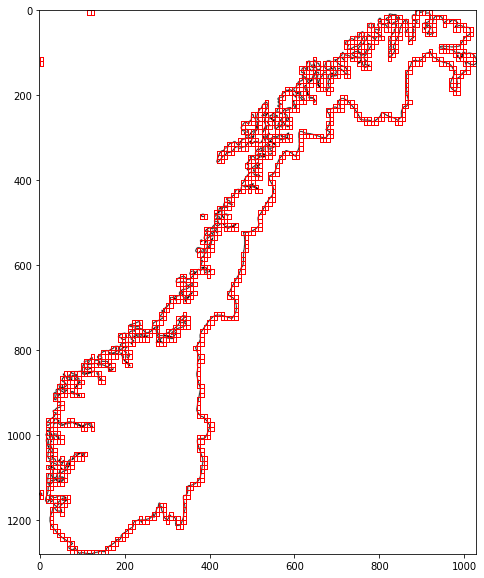

In [17]:
plt.figure(figsize = (10,10))
for boundary in boundary_boxes:    
    drawSingleBox(plt, boundary)
plt.imshow(img, cmap='gray')